# Animal Classification Using Convolutional Neural Network

## Importing Necessory Modules

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import os
import shutil
from sklearn.metrics import confusion_matrix as cm, classification_report as cr 
from sklearn.model_selection import train_test_split

## Creating Dataset of extracted Images using OS and shutil

In [14]:
path_to_data="./Datasets/"
path_to_cr_data="./Datasets/cropped/"

In [15]:
img_dirs=[]
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
paths=[]
for img in img_dirs:
     for i in os.listdir(img):
         paths.append(f"{img}/{i}")

In [17]:
bear=paths[:99]
cat=paths[99:198]
dog=paths[198:297]
lion=paths[297:396]

In [18]:
animal_file_name_dict={'bear':bear,
                      'cat':cat,
                      'dog':dog,
                      "lion":lion}

In [19]:
animal_file_name_dict

{'bear': ['./Datasets/cropped/cropped_bear/bear1.jpg',
  './Datasets/cropped/cropped_bear/bear10.jpg',
  './Datasets/cropped/cropped_bear/bear11.jpg',
  './Datasets/cropped/cropped_bear/bear12.jpg',
  './Datasets/cropped/cropped_bear/bear13.jpg',
  './Datasets/cropped/cropped_bear/bear14.jpg',
  './Datasets/cropped/cropped_bear/bear15.jpg',
  './Datasets/cropped/cropped_bear/bear16.jpg',
  './Datasets/cropped/cropped_bear/bear17.jpg',
  './Datasets/cropped/cropped_bear/bear18.jpg',
  './Datasets/cropped/cropped_bear/bear19.jpg',
  './Datasets/cropped/cropped_bear/bear2.jpg',
  './Datasets/cropped/cropped_bear/bear20.jpg',
  './Datasets/cropped/cropped_bear/bear21.jpg',
  './Datasets/cropped/cropped_bear/bear22.jpg',
  './Datasets/cropped/cropped_bear/bear23.jpg',
  './Datasets/cropped/cropped_bear/bear24.jpg',
  './Datasets/cropped/cropped_bear/bear25.jpg',
  './Datasets/cropped/cropped_bear/bear26.jpg',
  './Datasets/cropped/cropped_bear/bear27.jpg',
  './Datasets/cropped/cropped_bear

In [20]:
class_dict={}
count=0
for animal_name in animal_file_name_dict.keys():
    class_dict[animal_name]=count
    count=count+1
class_dict

{'bear': 0, 'cat': 1, 'dog': 2, 'lion': 3}

In [21]:
x=[]
y=[]

for animal_name ,training_file in animal_file_name_dict.items():
    for training_image in training_file:
        img=cv2.imread(training_image)
        x.append(img)
        y.append(class_dict[animal_name])

In [22]:
x=np.array(x)
y=np.array(y)

In [23]:
y=y.reshape(396,1)

In [24]:
x.shape,y.shape

((396, 140, 140, 3), (396, 1))

## Splitting dataset into training and testing part

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((316, 140, 140, 3), (80, 140, 140, 3), (316, 1), (80, 1))

## Scaling images

In [27]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

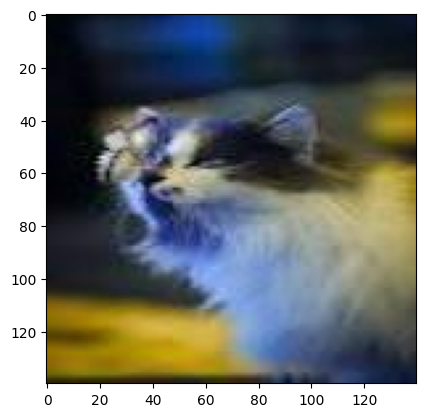

In [54]:
for i in range(0,5):
    plt.imshow(x_train_scaled[3])

# Developing convolutional neural network 

In [29]:
cnn=keras.Sequential([

    #CNN
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(140,140,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(140,140,3)),
    keras.layers.MaxPooling2D((2,2)),
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [31]:
cnn.fit(x_train_scaled,y_train,epochs=15)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1846 - loss: 4.4268
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 701ms/step - accuracy: 0.3615 - loss: 1.5998
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 660ms/step - accuracy: 0.5330 - loss: 1.0770
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 651ms/step - accuracy: 0.6821 - loss: 0.8000
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 660ms/step - accuracy: 0.7666 - loss: 0.5725
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 667ms/step - accuracy: 0.8302 - loss: 0.4781
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 661ms/step - accuracy: 0.9346 - loss: 0.3059
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 649ms/step - accuracy: 0.9424 - loss: 0.2169
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 682ms/step - accuracy: 0.9855 - loss: 0.1469
Epoch 10/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 682ms/step - accuracy: 0.9912 - loss: 0.0759
Epoch 11/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 658ms/step - accuracy: 0.9978 - loss: 0.0562
Epoch 12/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 646ms/ste

# got accuracy of 70 percent

In [32]:
cnn.evaluate(x_test_scaled,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6547 - loss: 1.1208


[1.0237632989883423, 0.699999988079071]

In [33]:
predicted=cnn.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


In [34]:
predictedd=[np.argmax(i) for i in predicted]

In [35]:
print(cr(y_test,predictedd))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.62      0.83      0.71        18
           2       0.54      0.37      0.44        19
           3       0.92      0.85      0.88        26

    accuracy                           0.70        80
   macro avg       0.68      0.69      0.67        80
weighted avg       0.70      0.70      0.69        80



Text(95.72222222222221, 0.5, 'Truth')

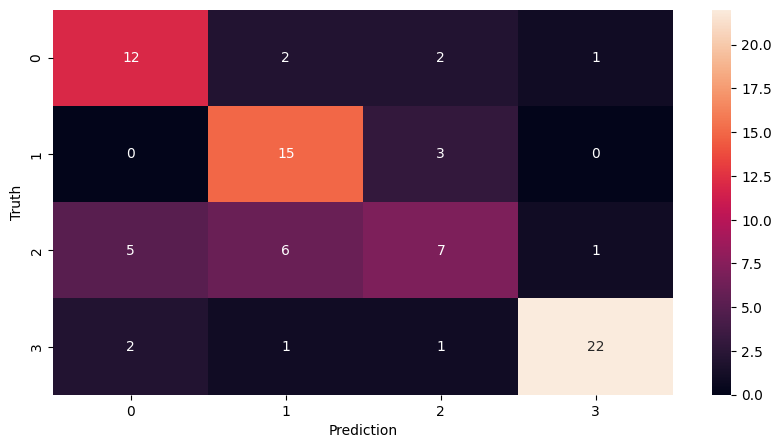

In [36]:
cmm=cm(y_test,predictedd)
plt.figure(figsize=(10,5))
sb.heatmap(cmm,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [37]:
classes=['Bear','Cat','Dog','Lion']

In [38]:
def prediction(path):
    img=cv2.imread(path)
    img_resize=cv2.resize(img,(140,140,))
    img_resize_sh=img_resize.reshape(1,140,140,3)
    img_scaled=img_resize_sh/255
    value=np.argmax(cnn.predict(img_scaled))
    return value

In [39]:
classes[prediction("rr.jfif")]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


'Lion'

In [40]:
class_dict

{'bear': 0, 'cat': 1, 'dog': 2, 'lion': 3}

In [42]:
import joblib

In [43]:
joblib.dump(cnn,'saved_model.pkl')

['saved_model.pkl']

In [55]:
classes[np.argmax(cnn.predict(x_train_scaled[3].reshape(1,140,140,3)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


'Cat'